In [ ]:
import pandas as pd
import xgboost as xgb
import numpy as np

In [ ]:
bookings=pd.read_csv('hotel_bookings_clean.csv')
bookings.info

<bound method DataFrame.info of         is_canceled  lead_time  arrival_date_week_number  \
0                 0        342                        27   
1                 0        737                        27   
2                 0          7                        27   
3                 0         13                        27   
4                 0         14                        27   
...             ...        ...                       ...   
119205            0         23                        35   
119206            0        102                        35   
119207            0         34                        35   
119208            0        109                        35   
119209            0        205                        35   

        arrival_date_day_of_month  arrival_date_month  \
0                               1                   7   
1                               1                   7   
2                               1                   7   
3                               1                   7   
4                               1                   7   
...                           ...                 ...   
119205                         30                   8   
119206                         31                   8   
119207                         31                   8   
119208                         31                   8   
119209                         29                   8   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     0       2       0.0   
1                             0                     0       2       0.0   
2                             0                     1       1       0.0   
3                             0                     1       1       0.0   
4                             0                     2       2       0.0   
...                         ...                   ...     ...       ...   
119205                        2                     5       2       0.0   
119206                        2                     5       3       0.0   
119207                        2                     5       2       0.0   
119208                        2                     5       2       0.0   
119209                        2                     7       2       0.0   

        babies  ...  reserved_room_type_G  reserved_room_type_H  \
0            0  ...                     0                     0   
1            0  ...                     0                     0   
2            0  ...                     0                     0   
3            0  ...                     0                     0   
4            0  ...                     0                     0   
...        ...  ...                   ...                   ...   
119205       0  ...                     0                     0   
119206       0  ...                     0                     0   
119207       0  ...                     0                     0   
119208       0  ...                     0                     0   
119209       0  ...                     0                     0   

        reserved_room_type_L  deposit_type_No_Deposit  \
0                          0                        1   
1                          0                        1   
2                          0                        1   
3                          0                        1   
4                          0                        1   
...                      ...                      ...   
119205                     0                        1   
119206                     0                        1   
119207                     0                        1   
119208                     0                        1   
119209                     0                        1   

        deposit_type_Non_Refund  deposit_type_Refundable  \
0                             0                        0   
1                             0                    

In [ ]:
bookings.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119206.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,27.163376,15.798717,6.552051,0.927053,2.499195,1.859206,0.104047,0.007961,...,0.017549,0.005042,0.000050,0.876277,0.122364,0.001359,0.034158,0.004815,0.750575,0.210452
std,0.483012,106.875450,13.601107,8.781070,3.089796,0.995117,1.897106,0.575186,0.398842,0.097509,...,0.131305,0.070825,0.007094,0.329266,0.327707,0.036839,0.181636,0.069223,0.432682,0.407631
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,4.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,7.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,161.000000,38.000000,23.000000,9.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,53.000000,31.000000,12.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='is_canceled'>

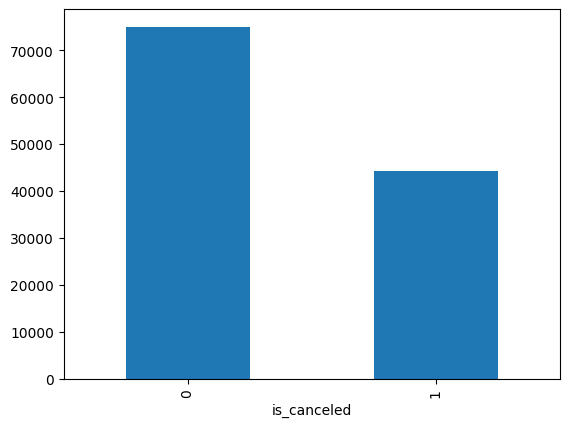

In [ ]:
bookings['is_canceled'].value_counts().plot(kind='bar')

In [ ]:
bookings['is_canceled'].value_counts()/bookings['is_canceled'].count()

,count
is_canceled,
0,0.629234
1,0.370766


In [ ]:
X, y = bookings.iloc[:,1:], bookings.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xgb_clf = xgb.XGBClassifier(random_state=123)
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [ ]:
preds=xgb_clf.predict(X_test)
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
accurancy=float(np.sum(preds==y_test))/y_test.shape[0]
print("Baseline accurancy:", accurancy)

Baseline accurancy: 0.8393171713782401


In [ ]:
xgb_clf.set_params(n_estimator=10)
xgb_clf.set_params(max_depth=3)
xgb_clf.set_params(leval_metric="error")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None,
              leval_metric='error', max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimator=10,
              n_estimators=None, n_jobs=None, ...)

In [ ]:
xgb_clf.fit(X_train, y_train)
preds=xgb_clf.predict(X_test)
accurancy=float(np.sum(preds==y_test))/y_test.shape[0]
print("Baseline accurancy:", accurancy)

Baseline accurancy: 0.8235466823253083


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
xgb_clf= xgb.XGBClassifier(eval_metric="error", random_state=123)
